## Report Background
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies

- How can Microsoft leverage on the insights of the current box office performance to create their own studio?
- What are the current trends in the film industry and what types of movies are performing well at the box office?
- What is the size of the movie industry?
- What does the competitive landscape look like?
- What is the financial opportunity in the movie industry
- Which genres are profitable?


In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# import the dfm_basics_rate data
dfm_basics_rate = pd.read_csv('data/dfm_basics_rate.csv')
print(dfm_basics_rate.shape)
dfm_basics_rate.head(2)

(69119, 10)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres1,genres2,genres3
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN


In [8]:
# import the df_budgets_tn data
df_budgets_tn = pd.read_csv('data/df_budgets_tn.csv')
print(df_budgets_tn.shape)
df_budgets_tn.sample(2)

(5698, 5)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
4021,2001-11-30,Behind Enemy Lines,40000000,58855732,58855732
4990,1994-09-23,Exotica,1500000,5046118,5046118


In [9]:
# import the dfm_basics_rate data
df_budg_gros = pd.read_csv('data/df_budg_gros.csv')
print(df_budg_gros.shape)
df_budg_gros.head(2)

(1238, 6)


,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year
0,Destroyer,9000000,1533324,3681096,Annapurna,2018
1,Vice,60000000,47836282,70883171,Annapurna,2018


In [42]:
# import the bom.movie_gross data
df_studios = pd.read_csv('data/bom.movie_gross.csv')
print(df_studios.shape)
df_studios.head(2)

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


### Data Background
Here we will explore some metrics to understand the film undustry:
- which genres are big?
- which movie studios are big?
- how long does a typical movie last?
- how many movies are produced each year?

### Which Genres Are Big?
The top 3 genres (Drama, Comedy and Documentary) make up over half of the movies produced

In [22]:
g = round(dfm_basics_rate.genres1.value_counts(normalize=True) * 100, 1).head(11)
print(g)

Drama          25.0
Comedy         20.5
Documentary    19.1
Action          9.6
Horror          6.1
Biography       4.8
Adventure       3.6
Crime           3.4
Thriller        2.0
Animation       1.3
Romance         1.1
Name: genres1, dtype: float64


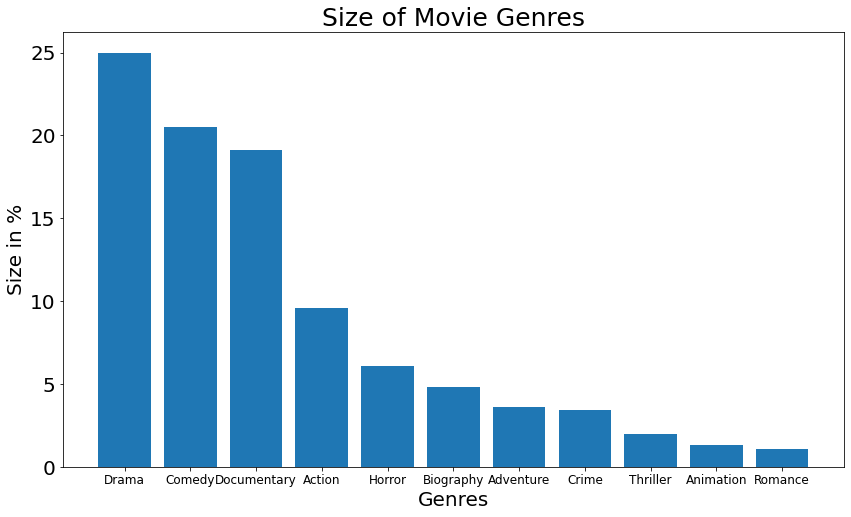

In [64]:
y = list(g.values)
x = list(g.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Genres', fontsize=20)
plt.xticks(fontsize=12)
plt.ylabel('Size in %', fontsize=20)
plt.yticks(fontsize=20)
plt.title('Size of Movie Genres', fontsize=25);

### Which Movie Studios Are Big?
The movie industry has many movie studios, totaling to 258 in our data. The plot below shows the size of movie studios based on the number of movies they have produced. This means there is no dominant market leader, with IFC, Universal, Warner Brothers, Fox and Magnet competing at the top

In [50]:
s = round(df_studios.studio.value_counts(normalize=True) * 100, 1).head(20)
print('Total # of studios: ', len(df_studios.studio.unique()))
print('\n')
print(s)


Total # of studios:  258


IFC       4.9
Uni.      4.3
WB        4.1
Fox       4.0
Magn.     4.0
SPC       3.6
Sony      3.3
BV        3.1
LGF       3.0
Par.      3.0
Eros      2.6
Wein.     2.3
CL        2.2
Strand    2.0
FoxS      2.0
RAtt.     2.0
KL        1.8
Focus     1.8
WGUSA     1.7
CJ        1.7
Name: studio, dtype: float64


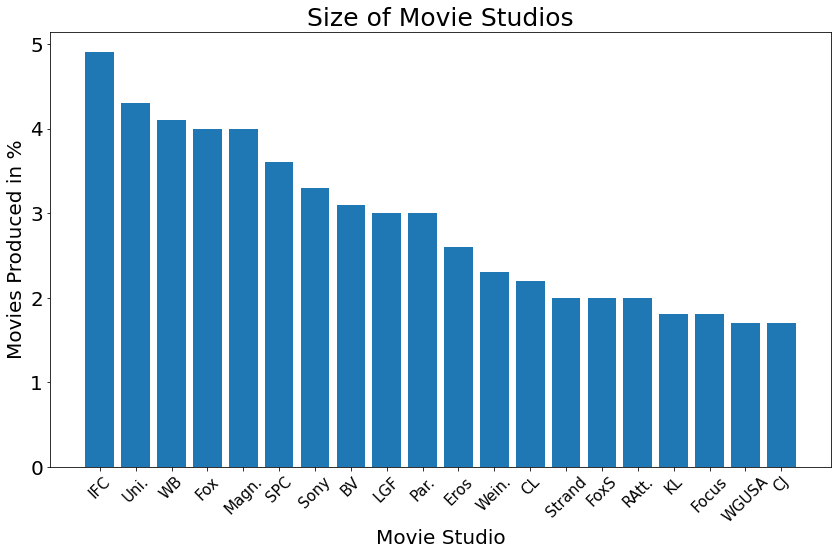

In [68]:
y = list(s.values)
x = list(s.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Movie Studio', fontsize=20)
plt.xticks(fontsize=15, rotation = 45)
plt.ylabel('Movies Produced in %', fontsize=20)
plt.yticks(fontsize=20)
plt.title('Size of Movie Studios', fontsize=25);

### How Long does a typical movie last?
A typical movie will last around 100 minutes. However, there are those that will last slightly under 50 minutes or upto 250 minutes

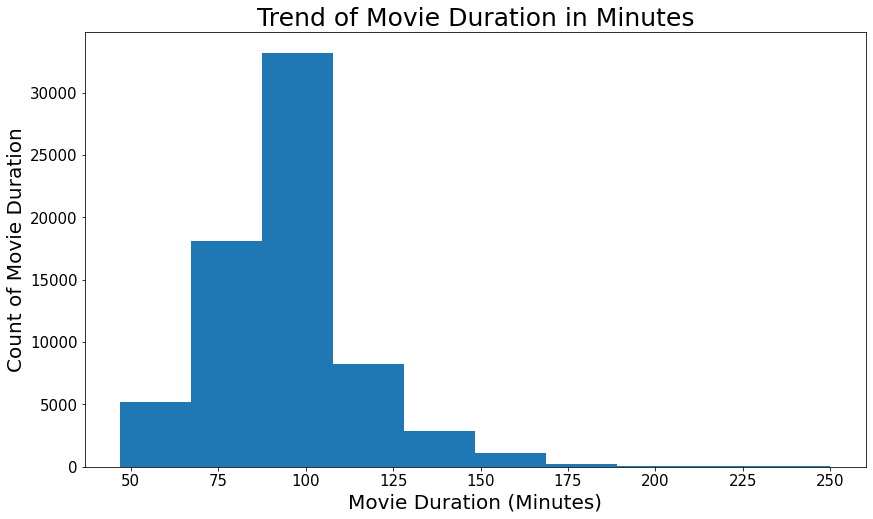

In [72]:
plt.figure(figsize=(14, 8))
plt.hist(dfm_basics_rate.runtime_minutes)
plt.xlabel('Movie Duration (Minutes)', fontsize=20)
plt.ylabel('Count of Movie Duration', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Trend of Movie Duration in Minutes', fontsize=25);

### How Many Movies Are Produced Per Year?
Movies produced have been rising consistently since 2010. The drop in 2018 and 2019 could be a structure of the database - it is possible there were less movies saved in the database for those 2 years

In [55]:
yr = dfm_basics_rate.start_year.value_counts().sort_index()

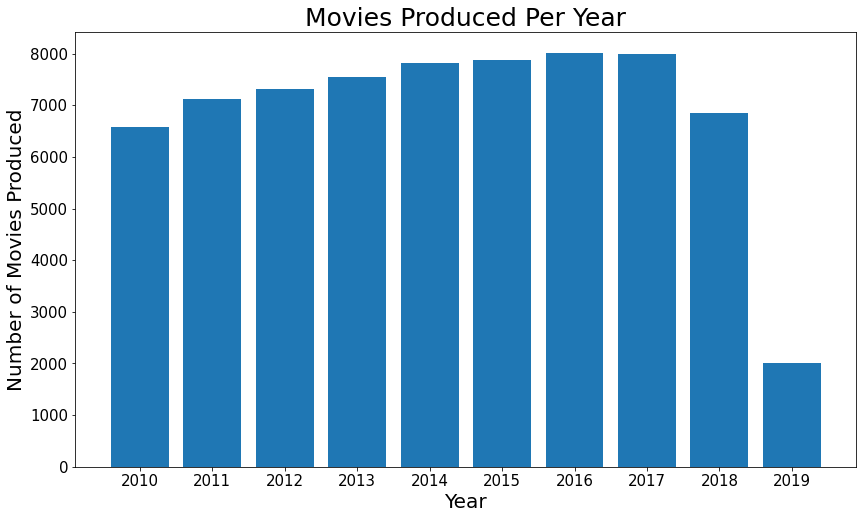

In [71]:
y = list(yr.values)
x = list(yr.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Year', fontsize=20)
plt.xticks(x, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of Movies Produced', fontsize=20)
plt.title('Movies Produced Per Year', fontsize=25);

###  Show Me The Money
Here we will explore what the movie industry looks like from a financial perspective:
- How much is spent annually to produce Movies
- Which genres spend the most on making movies?
- Which studios spend the most on making movies?
- Which movies had the biggest budgets?

Profitability analysis
- Which genres are the most profitable?
- Which studios are the most profitable?
- Which movies are the most profitable?

We start with some data prep below, to combine both domestic & foreign gross, then calculate profits made

In [87]:
# extract year from release date
df_budgets_tn['release_date'] = pd.to_datetime(df_budgets_tn['release_date'])
df_budgets_tn['year'] = df_budgets_tn['release_date'].dt.year
df_budgets_tn.sample(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,profit %,year
1269,2013-09-20,Feichang Xingyun,8000000,0,21970000,21970000,13970000,174.6,2013


In [77]:
# create total gross column
df_budgets_tn['total_gross'] = df_budgets_tn['domestic_gross'] + df_budgets_tn['worldwide_gross']
df_budgets_tn.sample(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
1901,2011-02-11,Justin Bieber: Never Say Never,13000000,73013910,99034125,172048035


In [80]:
# create profit column
df_budgets_tn['profit'] = df_budgets_tn['total_gross'] - df_budgets_tn['production_budget']
df_budgets_tn['profit %'] = round(((df_budgets_tn['total_gross']/df_budgets_tn['production_budget']) - 1) * 100, 1)
df_budgets_tn.sample(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,profit %
2282,2009-09-18,Jennifer's Body,16000000,16204793,31943401,48148194,32148194,200.9


In [84]:
# create a filtered verstion where profit is not -100% due to no gross earnings
# this will only be used for profitability analysis
df_budgets_tn1 = df_budgets_tn[df_budgets_tn['total_gross'] != 0]

In [85]:
df_budgets_tn1.shape

(5335, 8)

### How Much is spent Annually to Produce Movies?
Movie spend has been steady at the $ 70 - 80 billion mark, except in 2020 when it dropped sharply likely due to covid

In [96]:
an = df_budgets_tn.groupby('year')['production_budget'].sum().tail(11)
print(an)

year
2010    8929705650
2011    8952952300
2012    8485335173
2013    8899387000
2014    7753407373
2015    8842179400
2016    8973240000
2017    8405163000
2018    6883857000
2019    3533510000
2020     282000000
Name: production_budget, dtype: int64


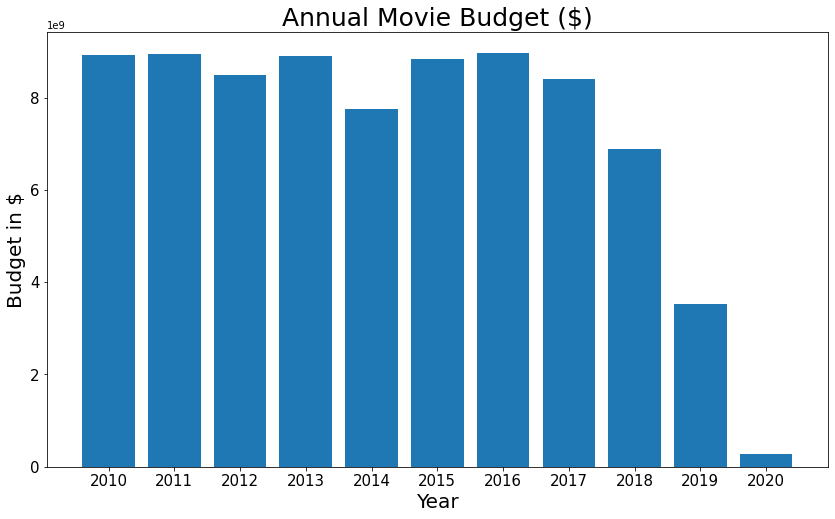

In [97]:
y = list(an.values)
x = list(an.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Year', fontsize=20)
plt.xticks(x, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Budget in $', fontsize=20)
plt.title('Annual Movie Budget ($)', fontsize=25);

### Which Genres Spend The Most on Production?
To answer this, we need to merge 2 tables, done below. Action genres is the biggest spender, dwarfing the rest.

In [102]:
# merge tables required for analysis
prod_ = pd.merge(dfm_basics_rate, df_budgets_tn, how='inner', left_on='primary_title', right_on='movie')
prod_.head(1)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres1,genres2,genres3,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,profit %,year
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Action,Animation,Comedy,2012-12-31,Foodfight!,45000000,0,73706,73706,-44926294,-99.8,2012


In [111]:
gen = prod_.groupby('genres1')['production_budget'].sum().sort_values(ascending=False)
gen

genres1
Action         36869040000
Adventure      13703749106
Comedy          8366637173
Drama           8366342723
Biography       3175278000
Crime           2550260000
Horror          1804917000
Documentary     1402403000
Animation       1012000000
Thriller         452075000
Mystery          305350000
Sci-Fi           257320000
Fantasy          134800000
Romance          131625000
War               40000000
Musical           25600000
Music             18000000
Family            16100000
Western            1000000
Name: production_budget, dtype: int64

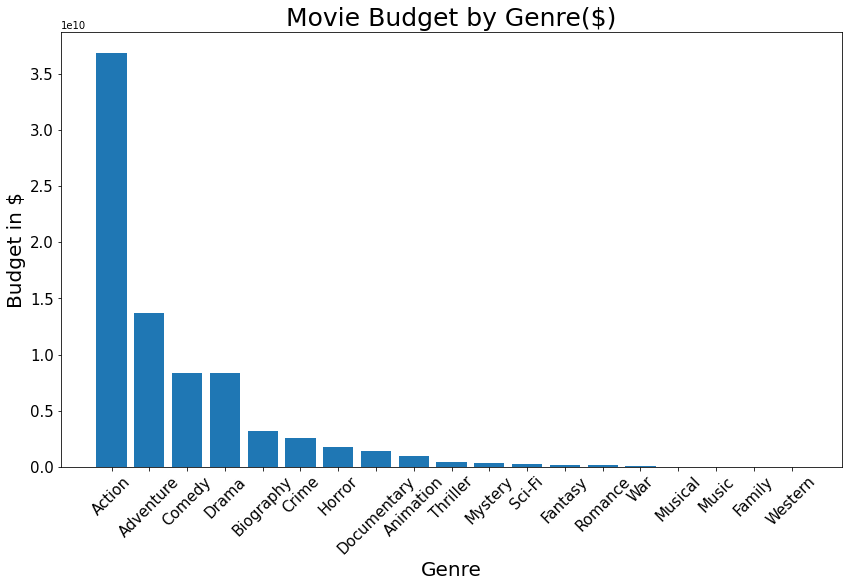

In [113]:
y = list(gen.values)
x = list(gen.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Genre', fontsize=20)
plt.xticks(x, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.ylabel('Budget in $', fontsize=20)
plt.title('Movie Budget by Genre($)', fontsize=25);

### Which Studios Spend the Most?
The biggest spending studios are Disney(BV), Warner Bros, Fox, Universal, Sony and Paramount

In [114]:
df_budg_gros.head(1)

,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year
0,Destroyer,9000000,1533324,3681096,Annapurna,2018


In [118]:
st = df_budg_gros.groupby('studio')['production_budget'].sum().sort_values(ascending=False).head(20)
st

studio
BV         9450800000
WB         8194000000
Fox        7668000000
Uni.       6370700000
Sony       5042500000
Par.       4767000000
WB (NL)    2148600000
LGF        2069387650
LG/S       1657500000
P/DW       1334000000
Wein.       838000000
Focus       831500000
SGem        727500000
Rela.       725500000
STX         534100000
ORF         527700000
FoxS        500380000
TriS        494800000
Sum.        409800000
SPC         310590000
Name: production_budget, dtype: int64

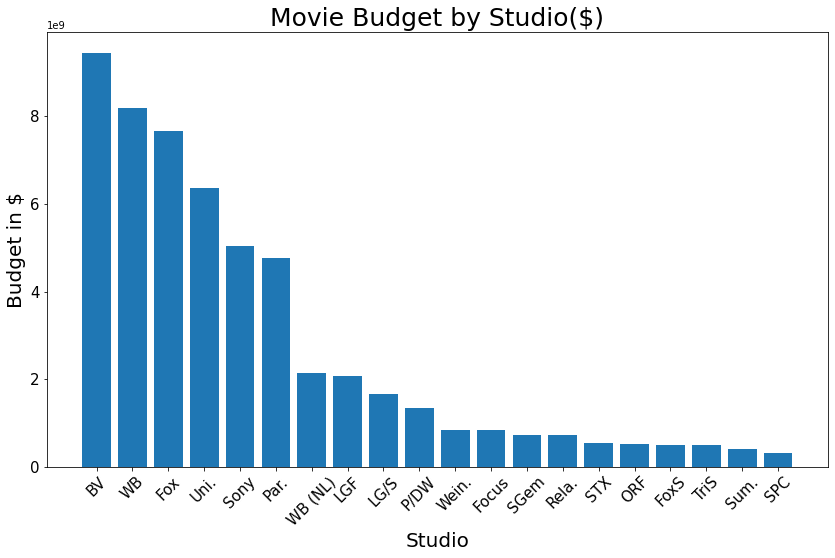

In [119]:
y = list(st.values)
x = list(st.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Studio', fontsize=20)
plt.xticks(x, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.ylabel('Budget in $', fontsize=20)
plt.title('Movie Budget by Studio($)', fontsize=25);

### Which Movies Had The Biggest Budgets

In [120]:
m = df_budg_gros.groupby('movie')['production_budget'].sum().sort_values(ascending=False).head(20)
m

movie
Pirates of the Caribbean: On Stranger Tides         410600000
Avengers: Age of Ultron                             330600000
Spectre                                             300000000
Avengers: Infinity War                              300000000
Justice League                                      300000000
Solo: A Star Wars Story                             275000000
John Carter                                         275000000
The Dark Knight Rises                               275000000
The Lone Ranger                                     275000000
Tangled                                             260000000
The Hobbit: The Desolation of Smaug                 250000000
Captain America: Civil War                          250000000
Batman v Superman: Dawn of Justice                  250000000
The Fate of the Furious                             250000000
The Hobbit: The Battle of the Five Armies           250000000
The Hobbit: An Unexpected Journey                   250000000
Pi

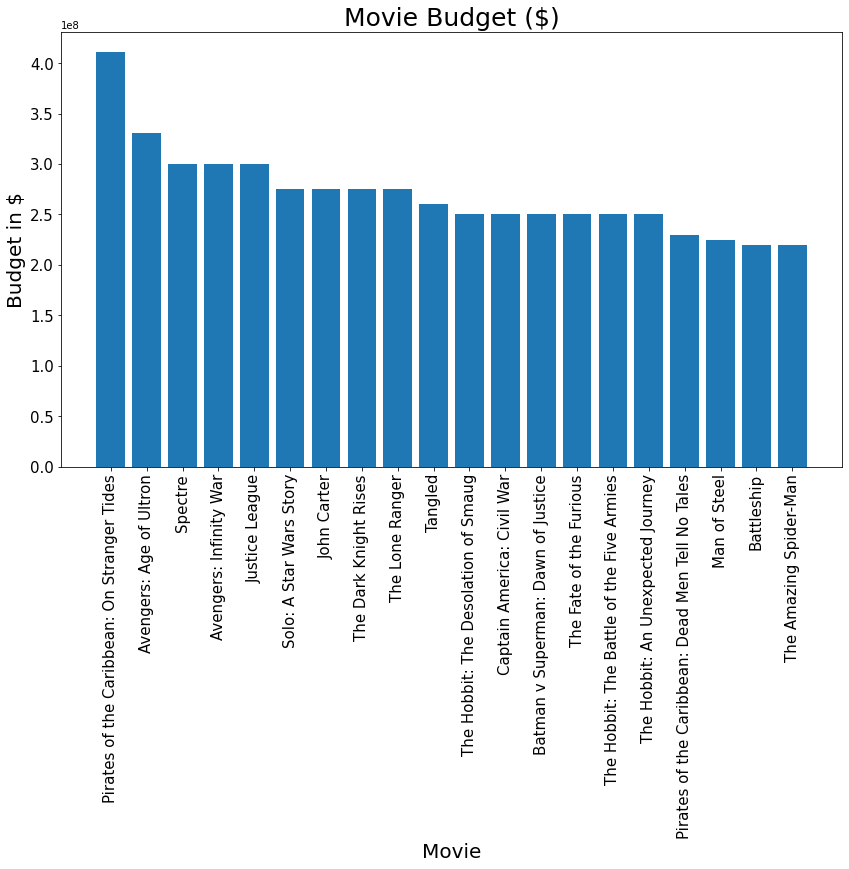

In [127]:
y = list(m.values)
x = list(m.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Movie', fontsize=20)
plt.xticks(x, fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Budget in $', fontsize=20)
plt.title('Movie Budget ($)', fontsize=25);

### Which Genres Are The Most Profitable?

In [128]:
# merge tables required for analysis
proF_ = pd.merge(dfm_basics_rate, df_budgets_tn1, how='inner', left_on='primary_title', right_on='movie')
proF_.head(1)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres1,genres2,genres3,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,profit %
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Action,Animation,Comedy,2012-12-31,Foodfight!,45000000,0,73706,73706,-44926294,-99.8


In [131]:
v = proF_.groupby('genres1')['profit'].sum().sort_values(ascending=False).head(20)
v

genres1
Action         114122132642
Adventure       50769426870
Comedy          28554640016
Drama           25601451444
Horror          12094544162
Biography       10939430462
Crime            6290424877
Animation        4571423827
Documentary      4487111206
Thriller         1075930809
Mystery           954058977
Sci-Fi            934600574
Fantasy           261900182
Romance           104124358
Family             45072238
Musical            36993180
War                20398210
Music              -5497127
Name: profit, dtype: int64

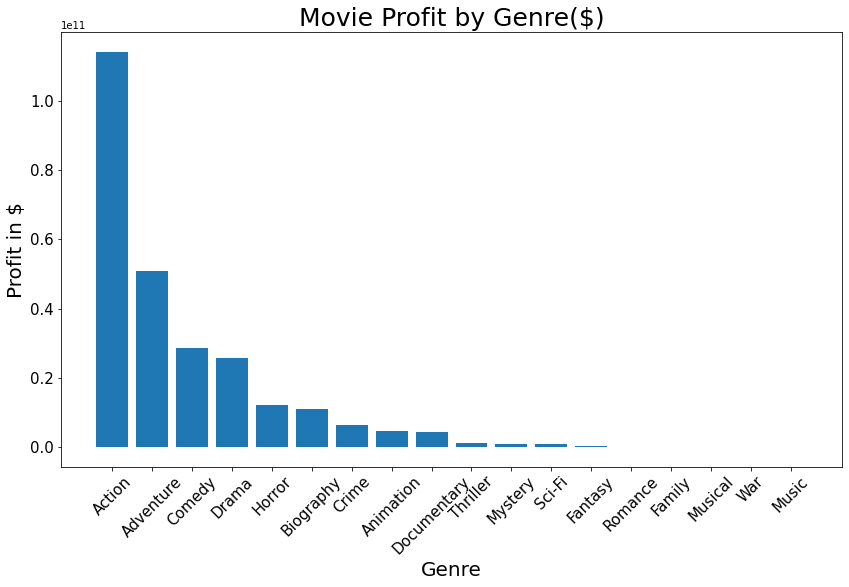

In [132]:
y = list(v.values)
x = list(v.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Genre', fontsize=20)
plt.xticks(x, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.ylabel('Profit in $', fontsize=20)
plt.title('Movie Profit by Genre($)', fontsize=25);

### Is There A Relationship Between Movie Rating & Profitability?

The scatter plot below shows there is hardly any relationship between movie rating and profitability

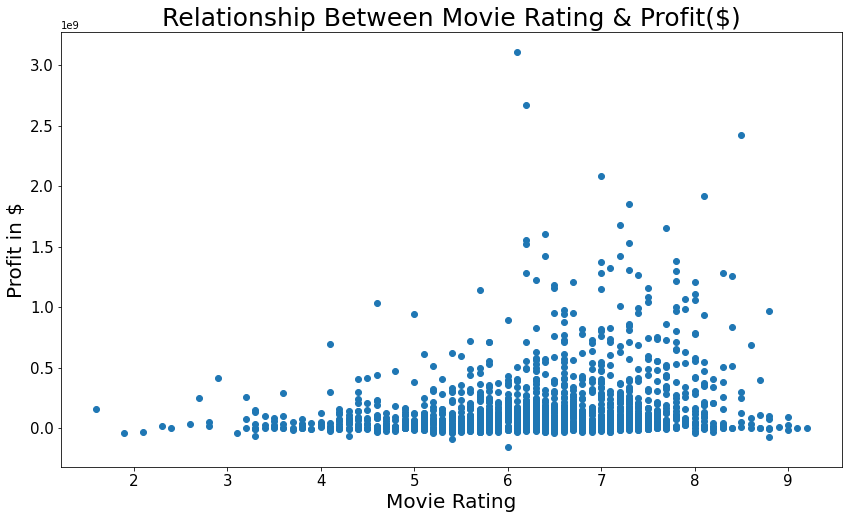

In [142]:
plt.figure(figsize=(14, 8))
plt.scatter(proF_.averagerating, proF_.profit)
plt.xlabel('Movie Rating', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Profit in $', fontsize=20)
plt.title('Relationship Between Movie Rating & Profit($)', fontsize=25);

### Which Studios Are the Most Profitable?

In [135]:
df_budg_gros

,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year
0,Destroyer,9000000,1533324,3681096,Annapurna,2018
1,Vice,60000000,47836282,70883171,Annapurna,2018
2,On the Basis of Sex,20000000,24622687,38073377,Focus,2018
3,Aquaman,160000000,335061807,1146894640,WB,2018
4,Second Act,15700000,39282227,63288854,STX,2018
...,...,...,...,...,...,...
1233,City of Ghosts,17500000,325491,325491,IFC,2017
1234,Jackpot,400000,44452,44452,DR,2014
1235,Evolution,80000000,38311134,98341932,IFC,2016
1236,Playing for Keeps,35000000,2000000,2000000,FD,2012


In [136]:
# profit cols
df_budg_gros['total_gross'] = df_budg_gros['domestic_gross_x'] + df_budg_gros['worldwide_gross']
df_budg_gros['profit'] = df_budg_gros['total_gross'] - df_budg_gros['production_budget']
df_budg_gros['profit %'] = round(((df_budg_gros['total_gross']/df_budg_gros['production_budget']) - 1) * 100, 1)
df_budg_gros.sample(1)

,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year,total_gross,profit,profit %
1052,Season of the Witch,40000000,24827228,91126600,Rela.,2011,115953828,75953828,189.9


In [137]:
st1 = df_budg_gros.groupby('studio')['profit'].sum().sort_values(ascending=False).head(20)
st1

studio
BV         36761360108
Uni.       31202098612
Fox        28050218449
WB         23126958390
Sony       19437638794
Par.       15678256930
WB (NL)     9809894397
LGF         8246466100
P/DW        5426942287
LG/S        3658229914
Wein.       3260145074
SGem        2760659981
FoxS        2530061056
Focus       2397429012
TriS        2001675977
Sum.        1649645228
Rela.       1598174662
STX         1219661497
ORF         1035748066
SPC          706803022
Name: profit, dtype: int64

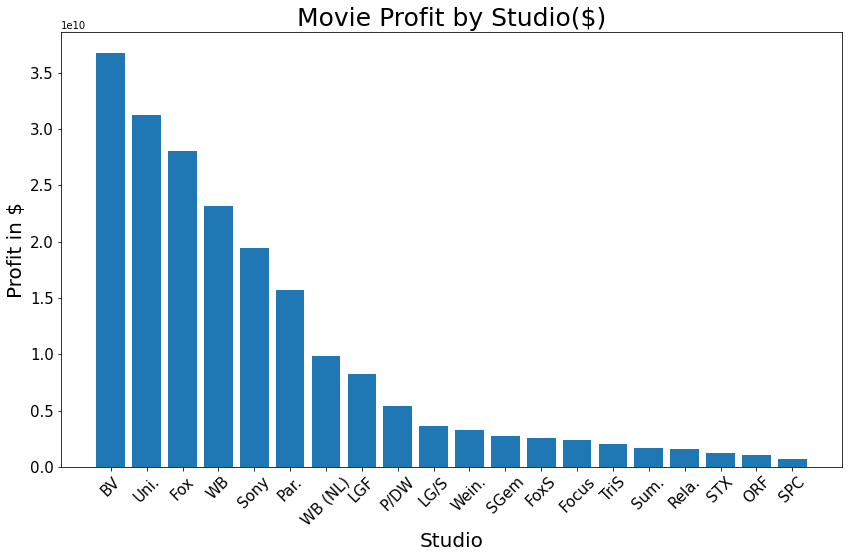

In [138]:
y = list(st1.values)
x = list(st1.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Studio', fontsize=20)
plt.xticks(x, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.ylabel('Profit in $', fontsize=20)
plt.title('Movie Profit by Studio($)', fontsize=25);

### Summary
The top 3 genres (Drama, Comedy and Documentary) make up over half of the movies produced
Movie industry is cluttered with over 250 studios. This means there is no dominant market leader, with IFC, Universal, Warner Brothers, Fox and Magnet competing at the top, in terms of movie volumes
The biggest spending studios are Disney(BV), Warner Bros, Fox, Universal, Sony and Paramount – they are also the most profitable
A typical movie will last around 100 minutes. However, there are those that will last slightly under 50 minutes or up to 250 minutes
Action genres is the biggest spender, and also the most profitable


### Recommendation
Action genres are not the biggest by number of movies produced. They however have the biggest budget and are the most profitable. Thus, this would be the first genre to consider production movies in, followed by adventure and comedy

The movie industry is saturated and has many players. Thus Microsoft will need to diversify beyond the box office and think of leveraging new technology like stream to increase audience reach

Significant monetary investment required as the average movie cost roughly 31 million dollars